# 당뇨병 데이터셋 미리보기

EDA 탐색적 데이터 분석을 통해서 전처리 과정

Text(0.5, 1.0, '한글 타이틀...')

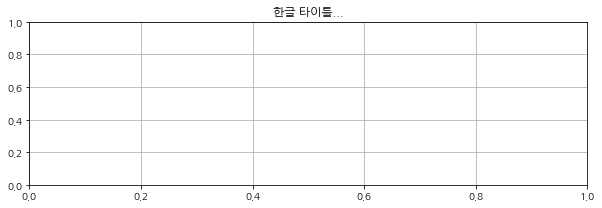

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

# font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!
plt.rc('font', family=fontname)
# plt.rcParams["font.family"] = fontname
# plt.rc('font', family='AppleGothic')  #  

# matplotlib 설정
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 타이틀...')

#### Pima Indians Diabetes


[Pima](https://en.wikipedia.org/wiki/Pima_people)는 아리조나에 사는 미국 원주민들의 그룹이다. 유전적인 성향은 이 그룹이 몇 년 동안 탄수화물이 부족한 식단에서도 정상적으로 살아남을 수 있도록 해주었다. 최근 몇 년 동안, 전통적인 농업 작물에서 가공된 식품으로의 갑작스런 이동과 함께, 신체 활동의 감소로 인해, 그들은 **제2형 당뇨병(2 diabetes)의 가장 높은 발병률**을 나타냈고, 이러한 이유로 그들은 많은 연구의 대상이 되어왔다.

데이터는 아래 컬럼을 갖는다:

1.   Pregnancies
1.   Glucose  
1.   BloodPressure
1.   SkinThickness  
1.   Insulin  
1.   BMI
1.   DiabetesPedigreeFunction
1.   Age
1.   Outcome

#### 데이터 로드:kaggle

In [2]:
diabetes = pd.read_csv('../dataset/diabets_kaggle/diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### 데이터 로드: 원본

In [22]:
diabetes = pd.read_csv( '../data/pima-indians-diabetes.data', header=None)

In [23]:
diabetes.columns = [
    'Pregnancies', 'Glucose', 'BloodPressure',
    'SkinThickness', 'Insulin', 'BMI',
    'DiabetesPedigreeFunction', 'Age','Outcome'
]

##  결측치 보기

결측치, 개수 등..

In [24]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


결측치를 

In [6]:
diabetes.isnull().head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [7]:
diabetes.isnull().sum()

NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

#### 수치데이터 살펴보기

- Glucose : 중앙값이 120인데 Min이 0으로 결측치 예상,
- BloodPressure: 혈압은 0이 나올수 없으므로 결측치 예상.
- SkinThickness: 피부두께도 0이 나올 수 없다 결측치 예상.
- Insulin: 0이 나올 수 없어 결측치 예상
- BMI:  0이 나올 수 없어 결측치 예상
DiabetesPedigreeFunction	Age	Outcome

In [25]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 훈련과 예측에 사용할 정답값을 시각화로 보기

가장 마지막 Outcome 제외한 컬럼,


In [8]:
feature_columns = diabetes.columns[:-1]
feature_columns

Index(['NumTimesPrg', 'PlGlcConc', 'BloodP', 'SkinThick', 'TwoHourSerIns',
       'BMI', 'DiPedFunc', 'Age'],
      dtype='object')

0값을 결측치 라 가정하고 정답(label, target)을 제외한 칼럼에 대해 결측치 여부를 구해 df_null 데이터 프레임에 담는다.

In [9]:
df_null = diabetes[feature_columns].replace(0, np.nan)
df_null = df_null.isnull()

결측치를 살펴보면 
 - insulliin 이 높은데, 결정트리에서도 분류에 영향을 미치지 못한것이 결측치가 많아서 그런듯하다.

In [10]:
df_null.sum()

NumTimesPrg      111
PlGlcConc          5
BloodP            35
SkinThick        227
TwoHourSerIns    374
BMI               11
DiPedFunc          0
Age                0
dtype: int64

막대 그래프

In [11]:
df_null.mean() * 100

NumTimesPrg      14.453125
PlGlcConc         0.651042
BloodP            4.557292
SkinThick        29.557292
TwoHourSerIns    48.697917
BMI               1.432292
DiPedFunc         0.000000
Age               0.000000
dtype: float64

<AxesSubplot:>

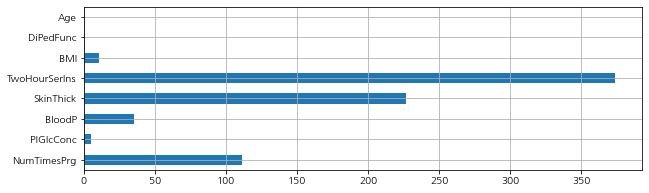

In [26]:
df_null.sum().plot.barh()

히트맵으로 그려보자

<AxesSubplot:>

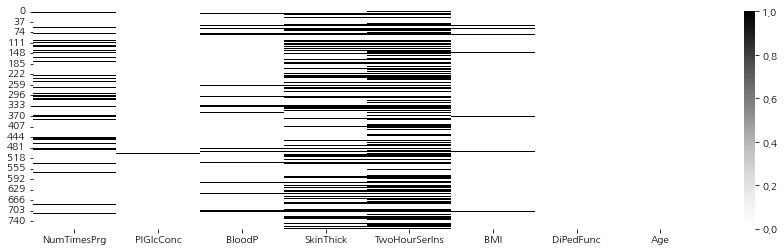

In [14]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap='Greys')

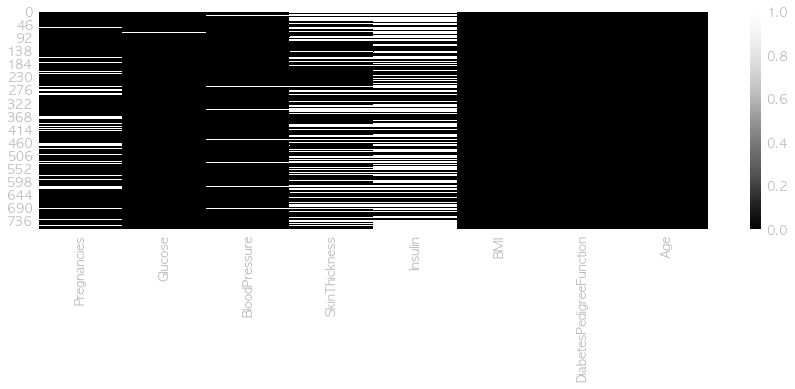

In [13]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap='Greys_r')

#### count plot

당뇨병 발병 여부를 판단하기 위해서 발병하는 빈도수를 표시. 카운트플롯은 범주형에 대한 빈도를 표시하기 좋음.

In [27]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

발병 비율로 보려면

In [28]:
diabetes['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

다른 변수와 함꼐 보면,

임신횟수와 발병여부를 묶어 보면, 임신횟수가 많을수록 비율이 높은것을 알 수 있다.

In [30]:
diabetes.groupby(['Pregnancies'])['Outcome'].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

임신횟수는 많지 않을것 같다.

In [31]:
diabetes.groupby(['Pregnancies'])['Outcome'].agg(['mean', 'count'])

,mean,count
Pregnancies,,
0,0.342342,111
1,0.214815,135
2,0.184466,103
3,0.360000,75
4,0.338235,68
5,0.368421,57
6,0.320000,50
7,0.555556,45
8,0.578947,38


임신횟수에 따른 당뇨병 발병 비율을  시각화 하면,

In [32]:
df_po = diabetes.groupby(['Pregnancies'])['Outcome'].agg(['mean', 'count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


각 빈도에 대한 시각화를 카운트플롯으로 보여보자, 전체 데이터의 플롯은,

<AxesSubplot:>

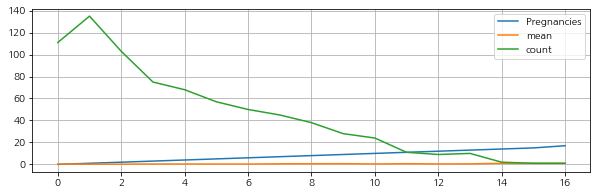

In [33]:
df_po.plot()

그러나 카운트와 mean 값의 단위가 다르므로 비교 분석이 의미가 없다. mean 값만 보면,

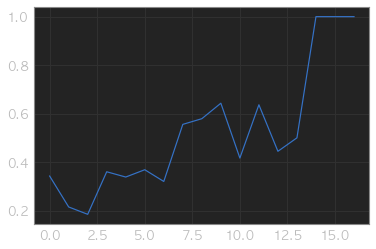

In [20]:
df_po['mean'].plot()

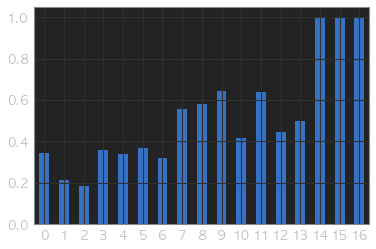

In [21]:
df_po['mean'].plot.bar(rot=0)

#### sns.countplot()

seaborn 의 카운트 플롯으로 그려보자,

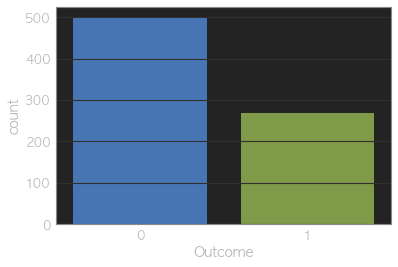

In [22]:
sns.countplot(data=diabetes, x='Outcome')

임신횟수에 따른 당뇨병 발병 빈도수를 비교해 보자

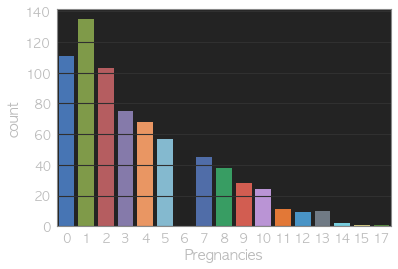

In [23]:
sns.countplot(data=diabetes, x='Pregnancies')

발병에 따라 다른 색으로 그려보자,

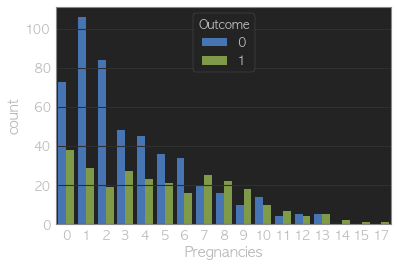

In [24]:
sns.countplot(data=diabetes, x='Pregnancies', hue='Outcome')

결과로 임신 7회 부터 발병이 많음을 알 수 있다. 그리고 결정트리에서 작은 빈도가 결정값으로 나타난 14~17 횟수 처럼 오버피팅할 염려도 있다. 이럴 경우 데이터를 범주형으로 나누어 분석하는 것이 효과적이다.

그래서 임신횟수의 많고 적음에 따라 pregancies_high 라는 범주형 컬럼을 추가한다.

In [25]:
diabetes['Pregnancies_high'] = diabetes['Pregnancies'] > 6
diabetes[['Pregnancies', 'Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


범주형으로 만든 빈도를 카운터 플롯으로 보면, 임신 횟수가 낮은 그룹은 발병이 낮고, 많으면 방병이 높음을 알 수 있다. (여기서는 6회 이상)

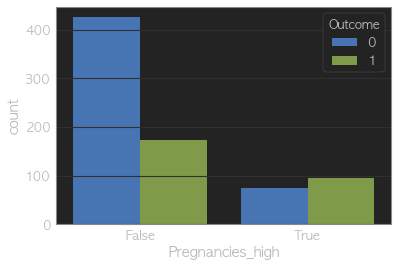

In [26]:
sns.countplot(data=diabetes, x='Pregnancies_high', hue='Outcome')

이런 수치화 데이터를 범주화를 하는 것은 One-hot 인코딩으로 사용한다.

##  두 개의 변수를 정답값에 따라 시각화 해보기



- 2개의 변수를 시각화할 수 있는 그래프를 이해하고, 사용할 수 있다

#### barplot()

당뇨병 발병에 따른 BMI 수치를 시본의 바플롯을 그려보자

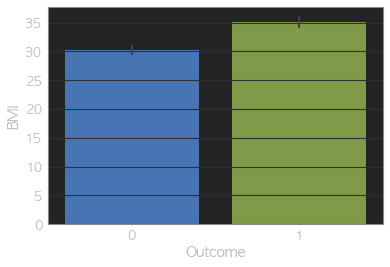

In [27]:
sns.barplot(data=diabetes, x='Outcome', y='BMI')

당뇨병 발병여부에 따라서 포도당gluecose 수치를 비교하자

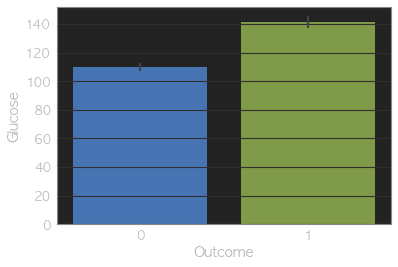

In [28]:
sns.barplot(data=diabetes, x='Outcome', y='Glucose')

당뇨병 발병여부에 따라서 인술린 수치를 비교하자, seaborn.barplot 은, 인자의 estimator 가 평균으로 되어 있어서y축을 평균으로 계산해 보여준다. 

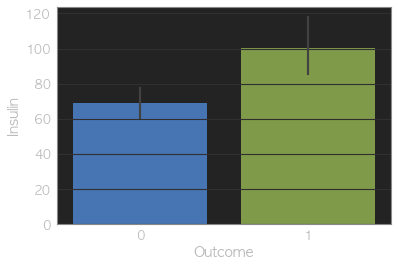

In [29]:
sns.barplot(data=diabetes, x='Outcome', y='Insulin')

barplot 의 검은 막대는 신뢰구간 인자 `ci=95` 가 샘플링한 데이터에서 차이가 남은 보인다.

임신횟수에 대해서 당뇨병 발병 비율을 비교하자.

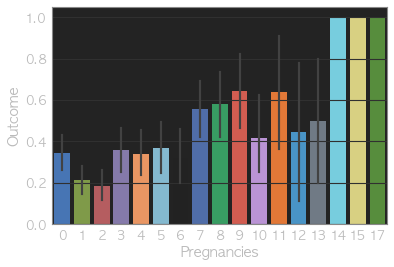

In [30]:
sns.barplot(data=diabetes, x='Pregnancies', y='Outcome')

임신횟수에 따른 포도당 수치를 발병여부와 비교하면 

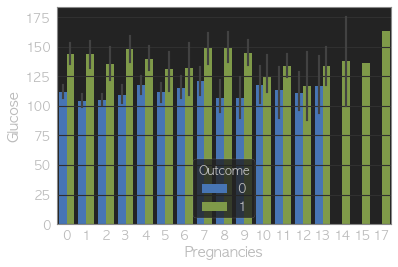

In [31]:
sns.barplot(data=diabetes, x='Pregnancies', y='Glucose', hue='Outcome')

임신횟수에 따른 체질량지수를 발병여부와 비교해보면, 발병에 따라 는다는 것은 아니미잠,ㄴ 발병한 사람들이 어느정도 높은 것은 알 수 있다.

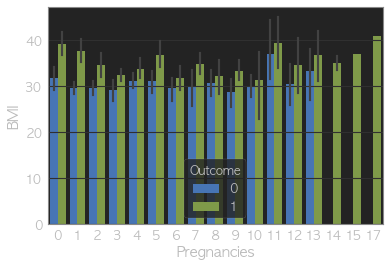

In [32]:
#임신횟수에 따른 체질량지수를 발병여부와 비교
sns.barplot(data=diabetes, x='Pregnancies', y='BMI', hue='Outcome')

임신횟수에 따른 인슐린 수치를 발병여부에 다라 시각화, 인슐린 수치는 결측치가 많으므로 0보다 큰 값에 대해서만 그린다.

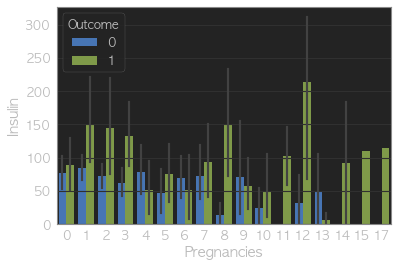

In [33]:
sns.barplot(data=diabetes, x='Pregnancies', y='Insulin', hue='Outcome')

슐린 값이 0인 값이 있어서 그래서 0을 제외하고 그려보자,

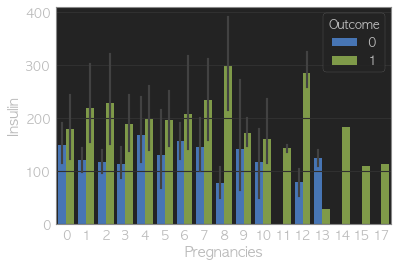

In [34]:
sns.barplot(data=diabetes[diabetes['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome')

#### boxplot()

인슐린수치가 높으며 에 따라 발병이 높아 보인다. 이것을 박스플롯으로 그려보면

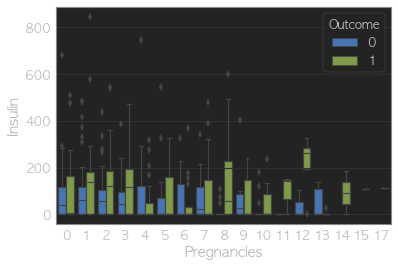

In [35]:
sns.boxplot(data=diabetes, x='Pregnancies', y='Insulin', hue='Outcome')

박스플롯이 0에 위치한 것은 인슐린 값이 0인 값이 있어서 그렇다. 그래서 0을 제외하고 그려보자,
 - 임신횟수가 높음에 따라 발병이 높다
 - 인슐린 수치가 높으면 발병이 높고 임신회수와도 연관이 있ㄷ.

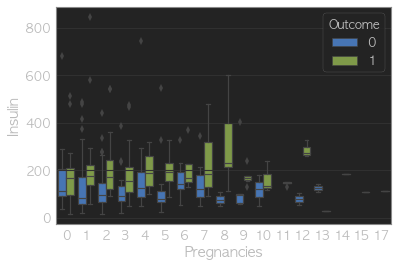

In [36]:
sns.boxplot(data=diabetes[diabetes['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome')

#### violinplot()

violinplot 으로 그려보자, 박스플롯은 박스가 표시하는 분포를 알기 어려운데, 바이올린 플롯은 분포를 볼 수 있다.

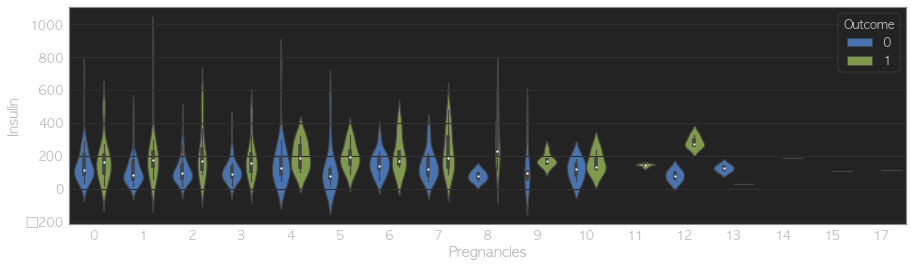

In [37]:
plt.figure(figsize=(15,4))
sns.violinplot(data=diabetes[diabetes['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome')

바올린플롯에서 0,1 두 개로 나뉘므로 0,1 각 플롯을 쪼개어 그려보면,

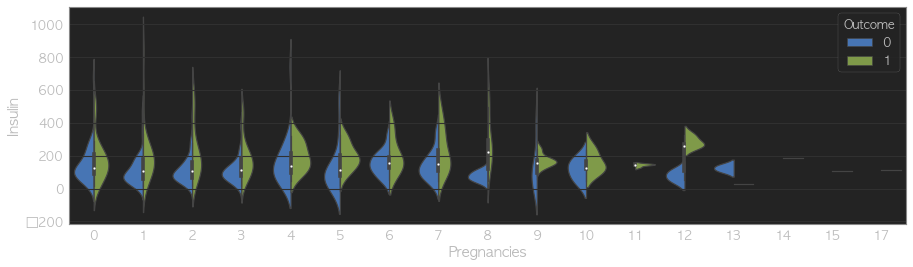

In [38]:
plt.figure(figsize=(15,4))
sns.violinplot(data=diabetes[diabetes['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome', split=True)

#### swarmplot()

스왐플롯은 산점도를 그려준다.

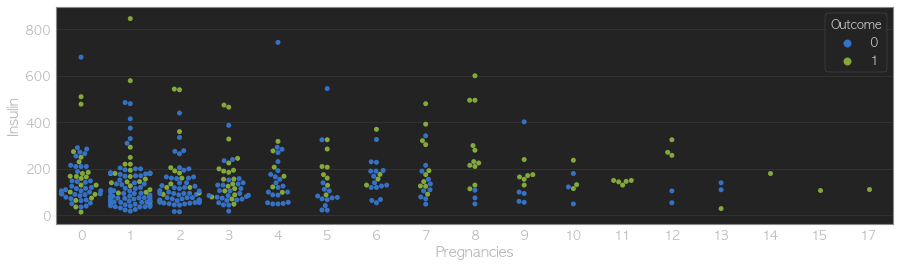

In [39]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=diabetes[diabetes['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome')

임신횟수가 많을때 데이터 모수가 작은 것을 확연히 알 수 있다.

### 2.1.5 수치형 변수의 분포를 정답값에 따라 시각화 해보기


수치형 변수의 분포를 시각화할 수 있는 distplot을 이해하고, 활용할 수 있다.

#### distplot()

한개의 연속된 수치 데이터를 표현할 때 디스트 플롯으로 그린다.

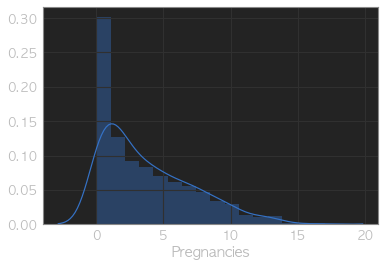

In [40]:
sns.distplot(diabetes['Pregnancies'])

임신횟수에 따른 당뇨병 발병 여부를 시각화 한다.

In [41]:
ㅠdf_0.shape, df_1.shape

((500, 10), (268, 10))

그래프를 그려보면 임신횟수가 5 밑은 발병이 낮지만, 5,6을 기점으로 발병이 더 많아 진다.

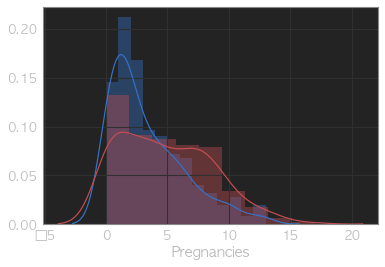

In [42]:
sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'], color='r')

countplot 으로 6회 이상으로 구분해서 그려 보았듯이 distplot 으로 횟수에 따른 결과를 명확히 볼 수 있다.임신횟수 5를 기점으로 발병이 많아지므로,



나이에 따른 발병 여부를 보기 위해서서 나이 분포를 보자,

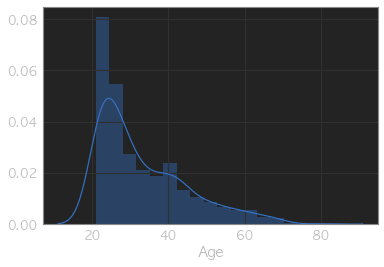

In [43]:
sns.distplot(diabetes['Age'])

발병, 발병하지 않는 케이스의 나이 분포를 보면 30세 이후 발병이 많다.

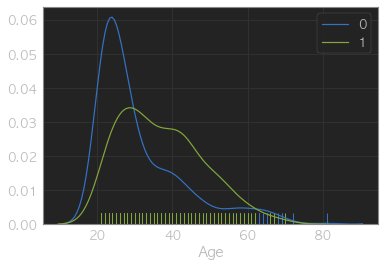

In [44]:
sns.distplot(df_0['Age'], hist=False, rug=True, label='0')
sns.distplot(df_1['Age'], hist=False, rug=True, label='1')

디스트플롯을 통해 30대 이후가 많으므로 범주화도 가능할 것 같다.

## 서브플롯으로 모든 변수 한번에 시각화 하기


모든 시각화를 서브 플롯으로 그려보자,


#### Pandas.histplot() 그리기

pandas 모든 변수를 histplot 으로 그려볼 수 있다. 그런데 histplot 은 boolean 값을 지원하지 않아서, 앞서 추가한 Pregnancies_high 컬럼을 숫자형으로 변경해야 한다.

In [45]:
diabetes['Pregnancies_high'] = diabetes['Pregnancies_high'].astype(int)
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0


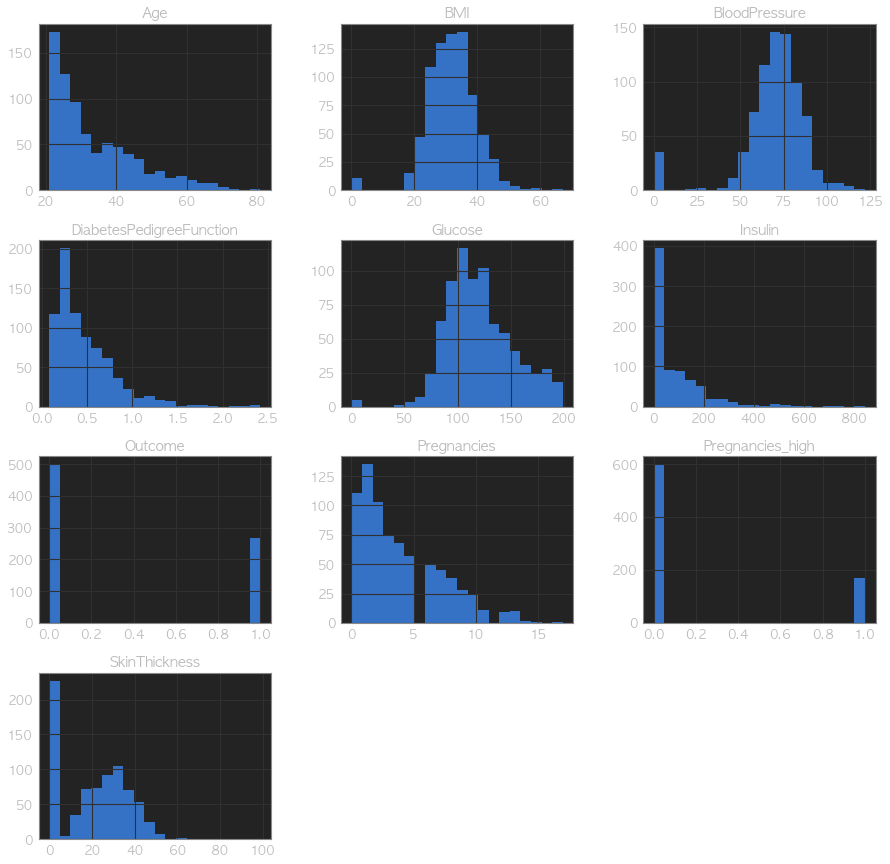

In [46]:
h = diabetes.hist(figsize=(15,15), bins=20)

#### 모든 distplot  그리기

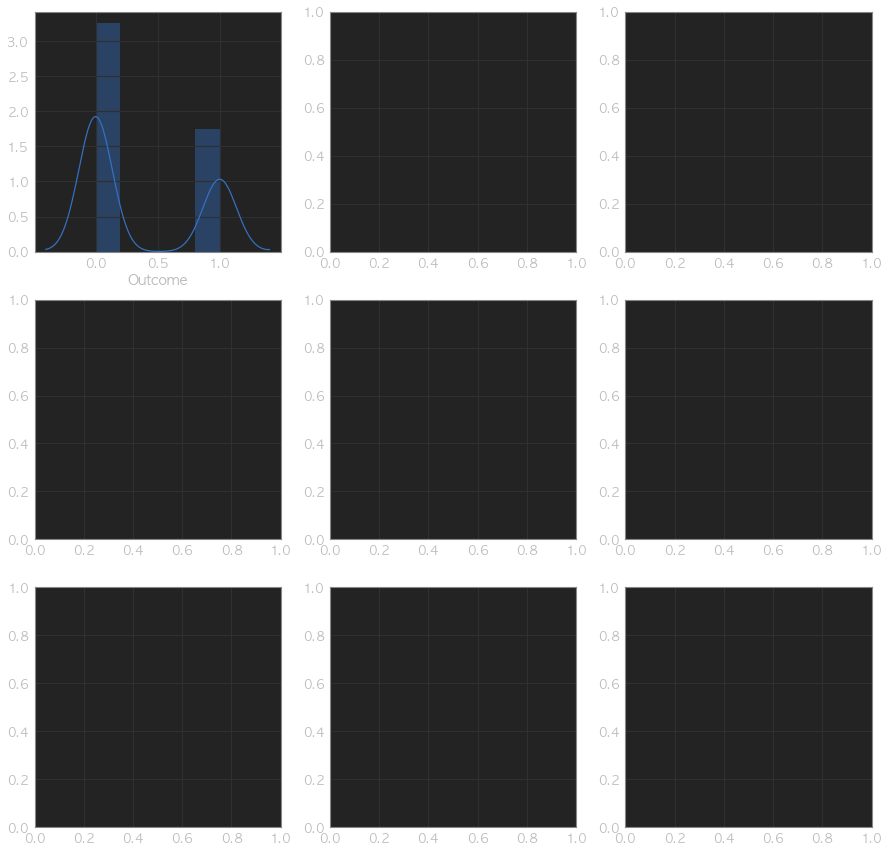

In [47]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
sns.distplot(diabetes['Outcome'], ax=axes[0][0])

In [48]:
cols = diabetes.columns[:-1]

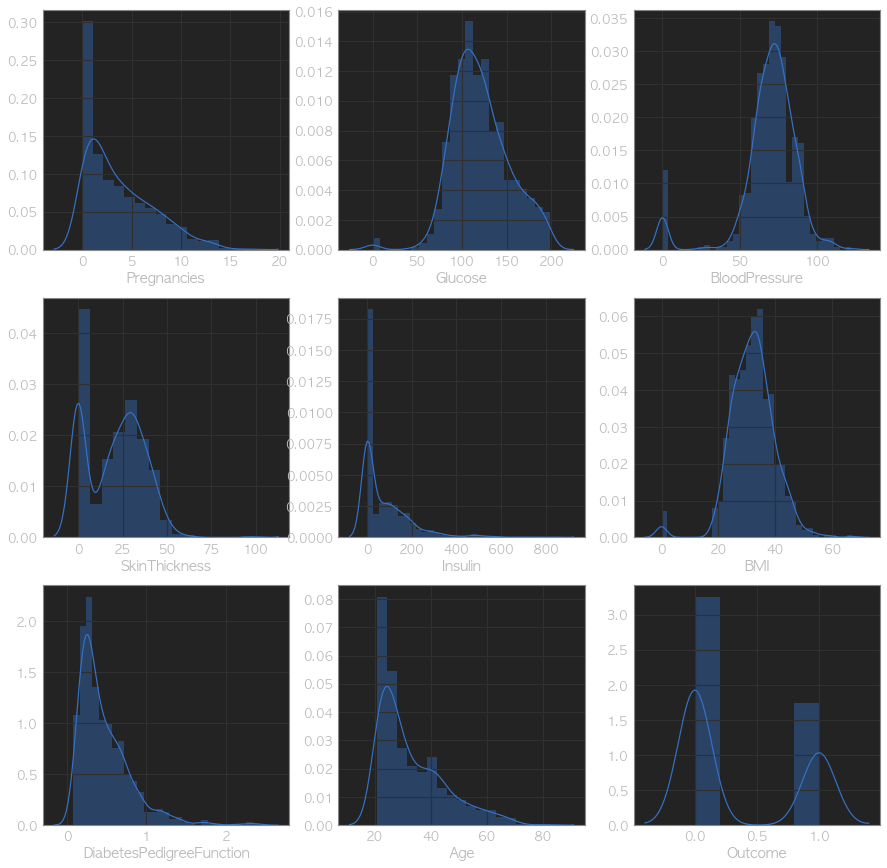

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i, name in enumerate(cols):
    row = i // 3
    col = i % 3
#     print(i, name, row, col)
    sns.distplot(diabetes[name], ax=axes[row][col])

distplot 의 y축은 x 값을 적분한 값을 사용한다.

Outcome 값을 기준으로 그려보자, 그래서 발병 여부에 따라서  그려야 므로, 앞서 생성한 발병에 따른 데이터 세트 df_0, df_1 을 그대로 사용하자.

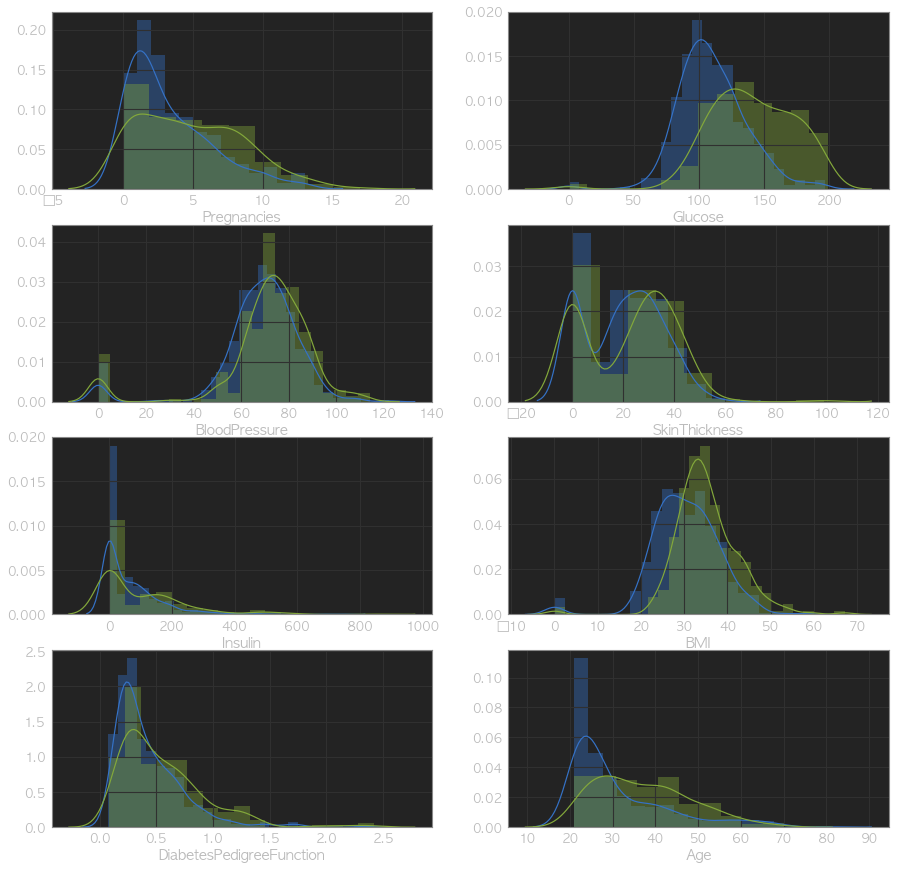

In [50]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, name in enumerate(cols[:-1]): #Outcome 컬럼 제외
    row = i // 2
    col = i % 2

    sns.distplot(df_0[name], ax=axes[row][col])
    sns.distplot(df_1[name], ax=axes[row][col])

## 시각화를 통한 변수간의 차이 이해하기

변수 간의 차이를 이해하기 위해 시각화 그래프를 그릴 수 있다.


#### viloinplot()


violin plot 으로 여러 서브플롯을 그려보면, 0에 몰려있는 데이터를 볼 수 있다. 이것은 대부분 결측치 일것이다.

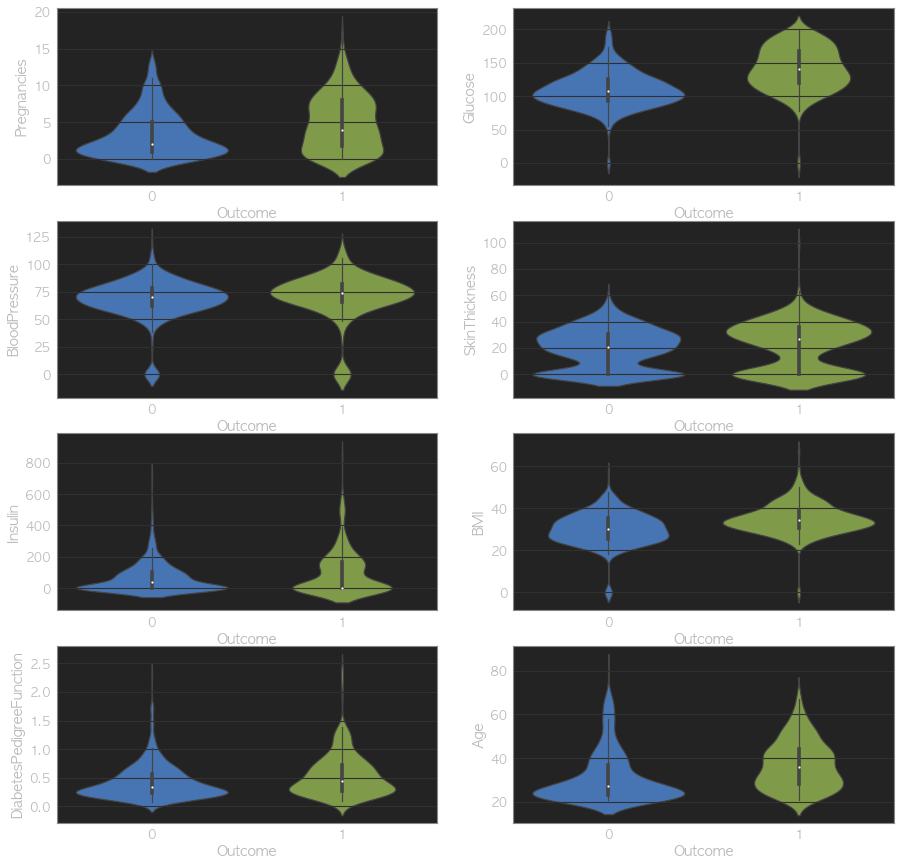

In [51]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, name in enumerate(cols[:-1]): #Outcome 컬럼 제외
    row = i // 2
    col = i % 2

    sns.violinplot(data=diabetes, x='Outcome', y=name, ax=axes[row][col])

결측치

glucos, insulin 은 당뇨병에 영향이 있지 않을까 하는 도메인 지식을 가지고 상관계수가 높을 것 같다.

#### regplot()

상관계수가 높은 두 변수에 대해 시각화 한다.  glucose, insulin 이 당뇨병 발병에 많은 영향을 줄 것이라는 도메인 지식에 대해 표시해 보자, 이것을 회귀선을 그려주는 regplot()으로 표현해 보자,

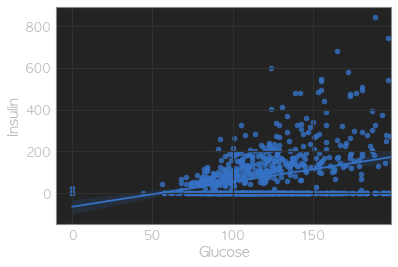

In [52]:
sns.regplot(data=diabetes, x='Glucose', y='Insulin')

회귀선이 0에 가깝게 그려진 것은 인슐린이 0이 많아서 그런것 같다. 발병에 대한 색상을 다르게 묶어서 표현하기 위해 hue 를 지정하고 싶지만 회귀선을 표현하는 regplot 은 hue 를 지원하지 않는다.



#### lmplot()

색상을 다르게 hue 로 발병을 묶어서 회귀선을 표현할 때는 lmplot()을 사용한다. 그려보면 인슐린이 0에 많이 보인다.

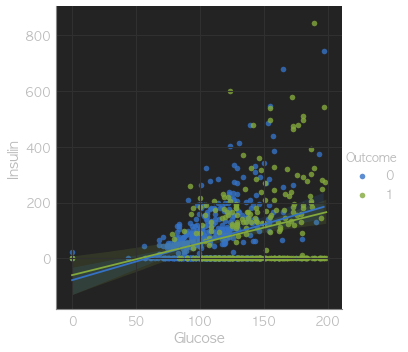

In [53]:
sns.lmplot(data=diabetes, x='Glucose', y='Insulin', hue='Outcome')

인슐린 수치가 0이상인 데이터로 그려보자, 그려보면 회귀선 기울기가 1에 가깝게 그려진다.

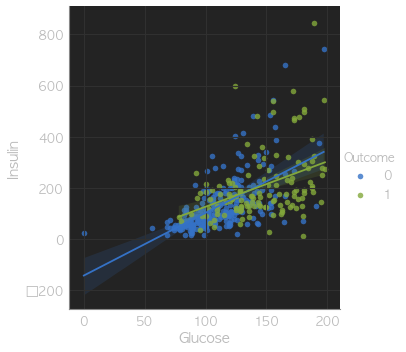

In [54]:
sns.lmplot(data=diabetes[diabetes['Insulin'] > 0], x='Glucose', y='Insulin', hue='Outcome')

#### pairplot()

PairGrid 를 통해서 **모든 변수**에 대해 Outcome 에 따른 scatterplot을 그려본다. 모든 변수를 그리기 때문에 시간이 걸린다.

```python
pairplot(data, kind={'scatter', 'reg'}) 
```

기본 스캐터 플롯으로 그려준다.

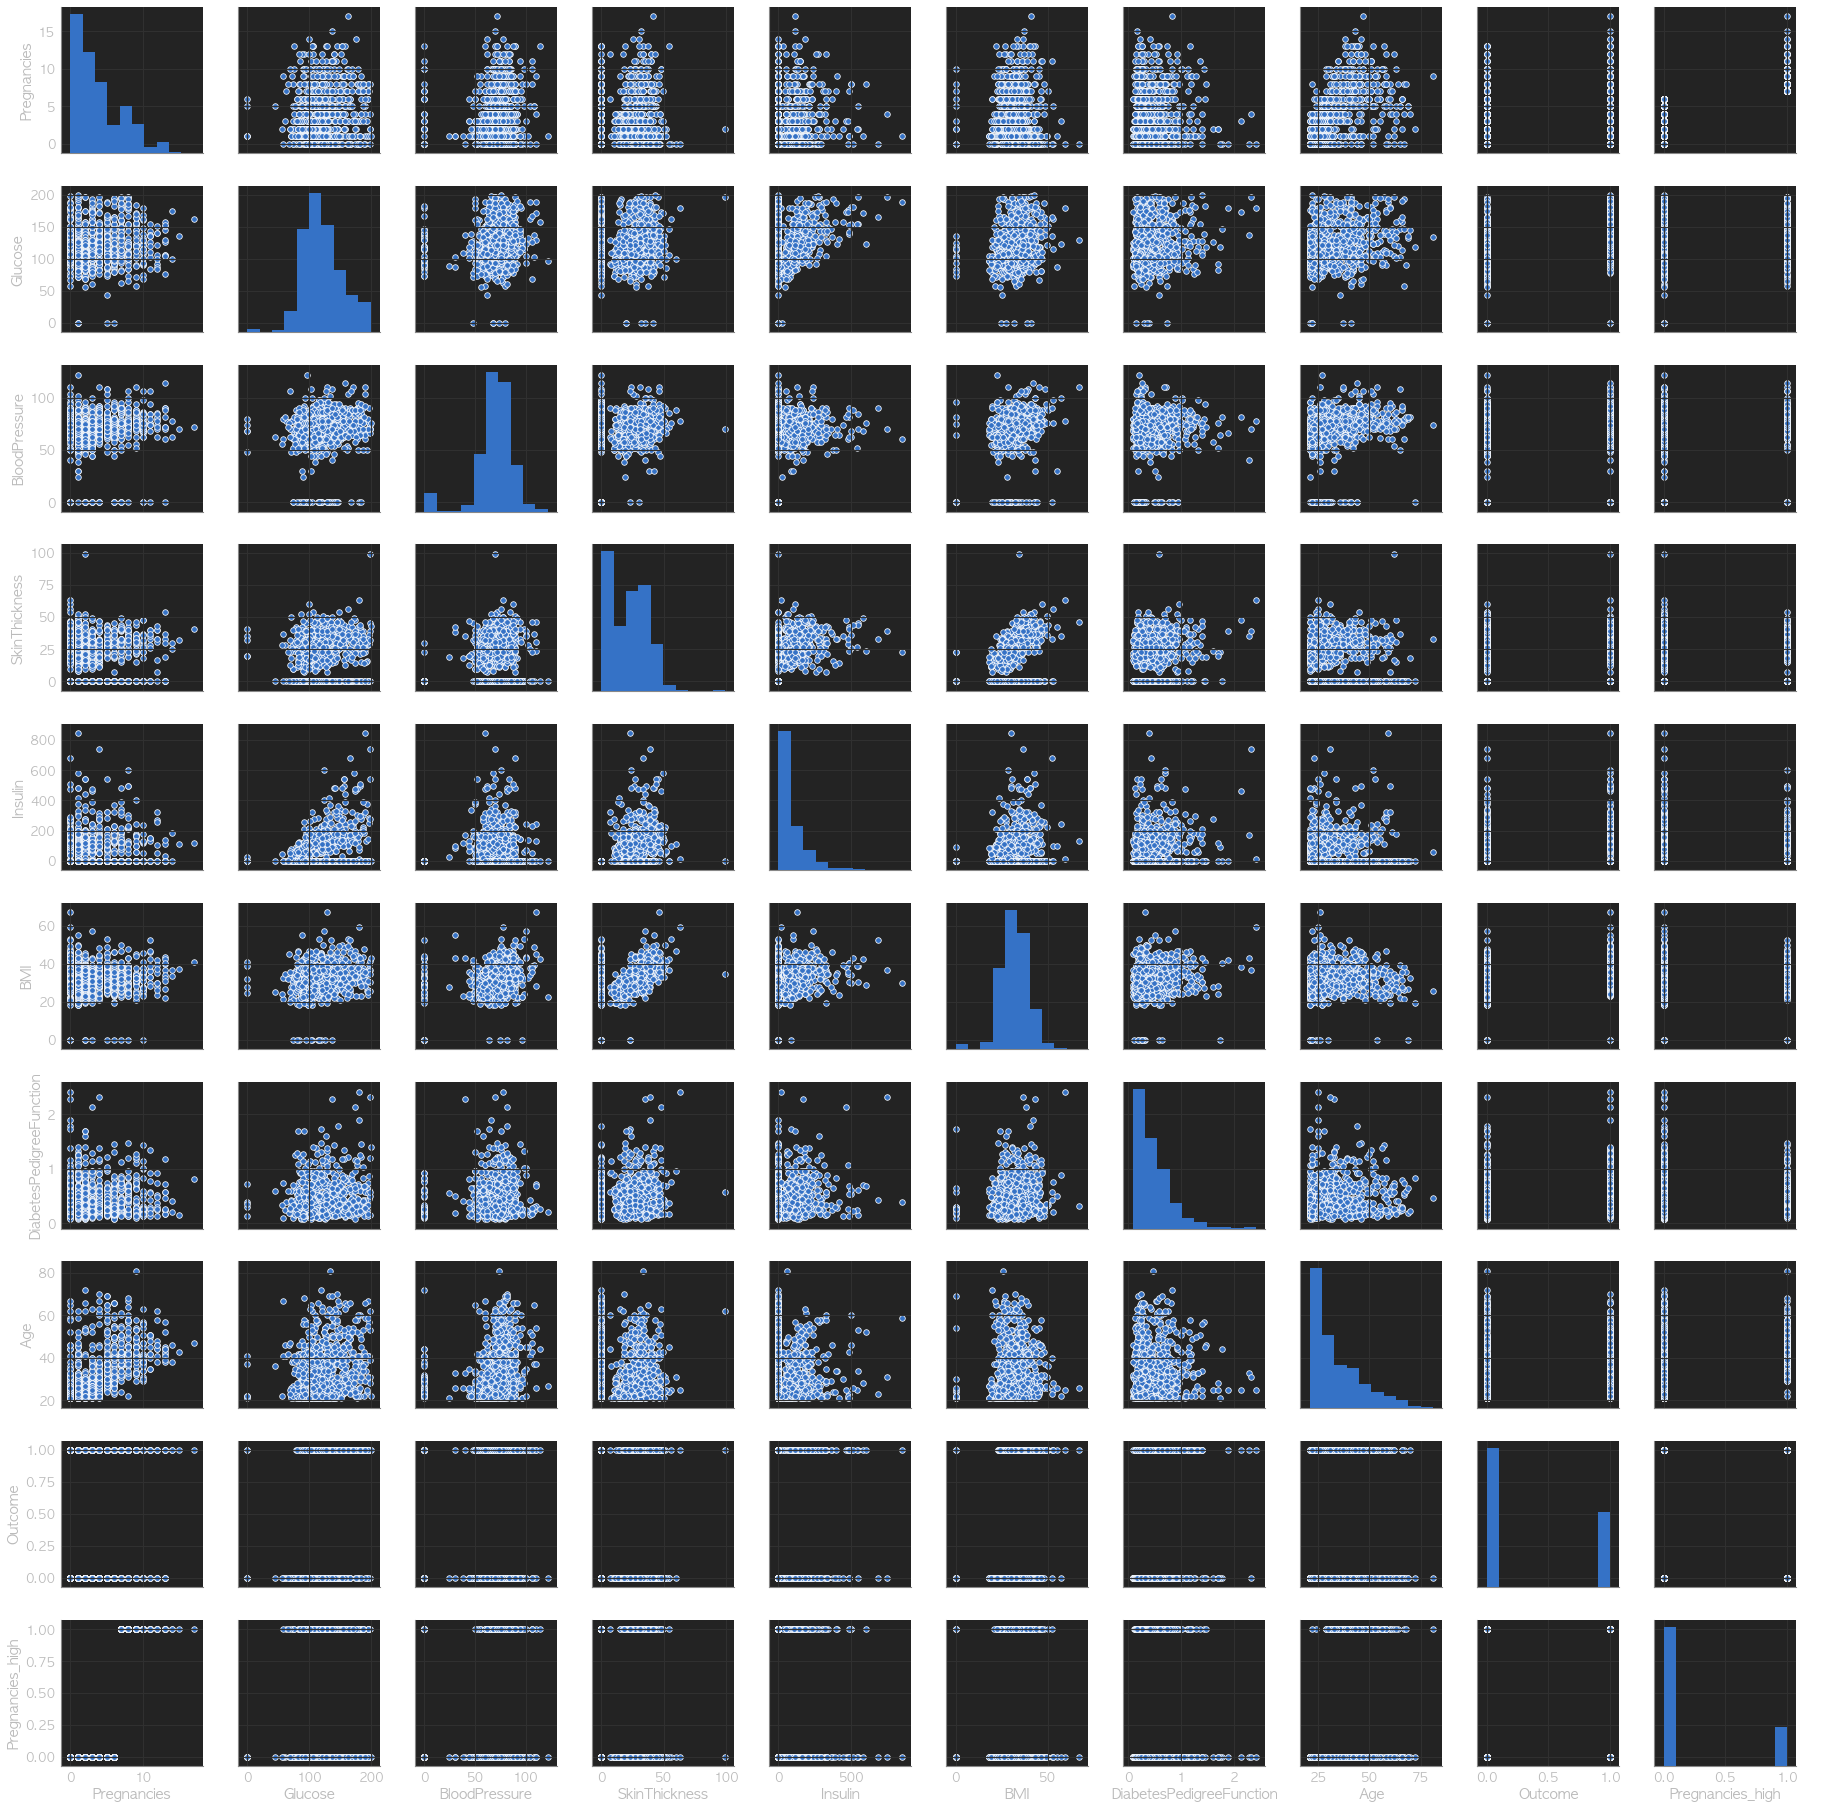

In [55]:
sns.pairplot(diabetes)

모든 회귀선을 pairplot(kind='reg') 로 그릴 수 있지만 pairgrid 를 이용해 보자,

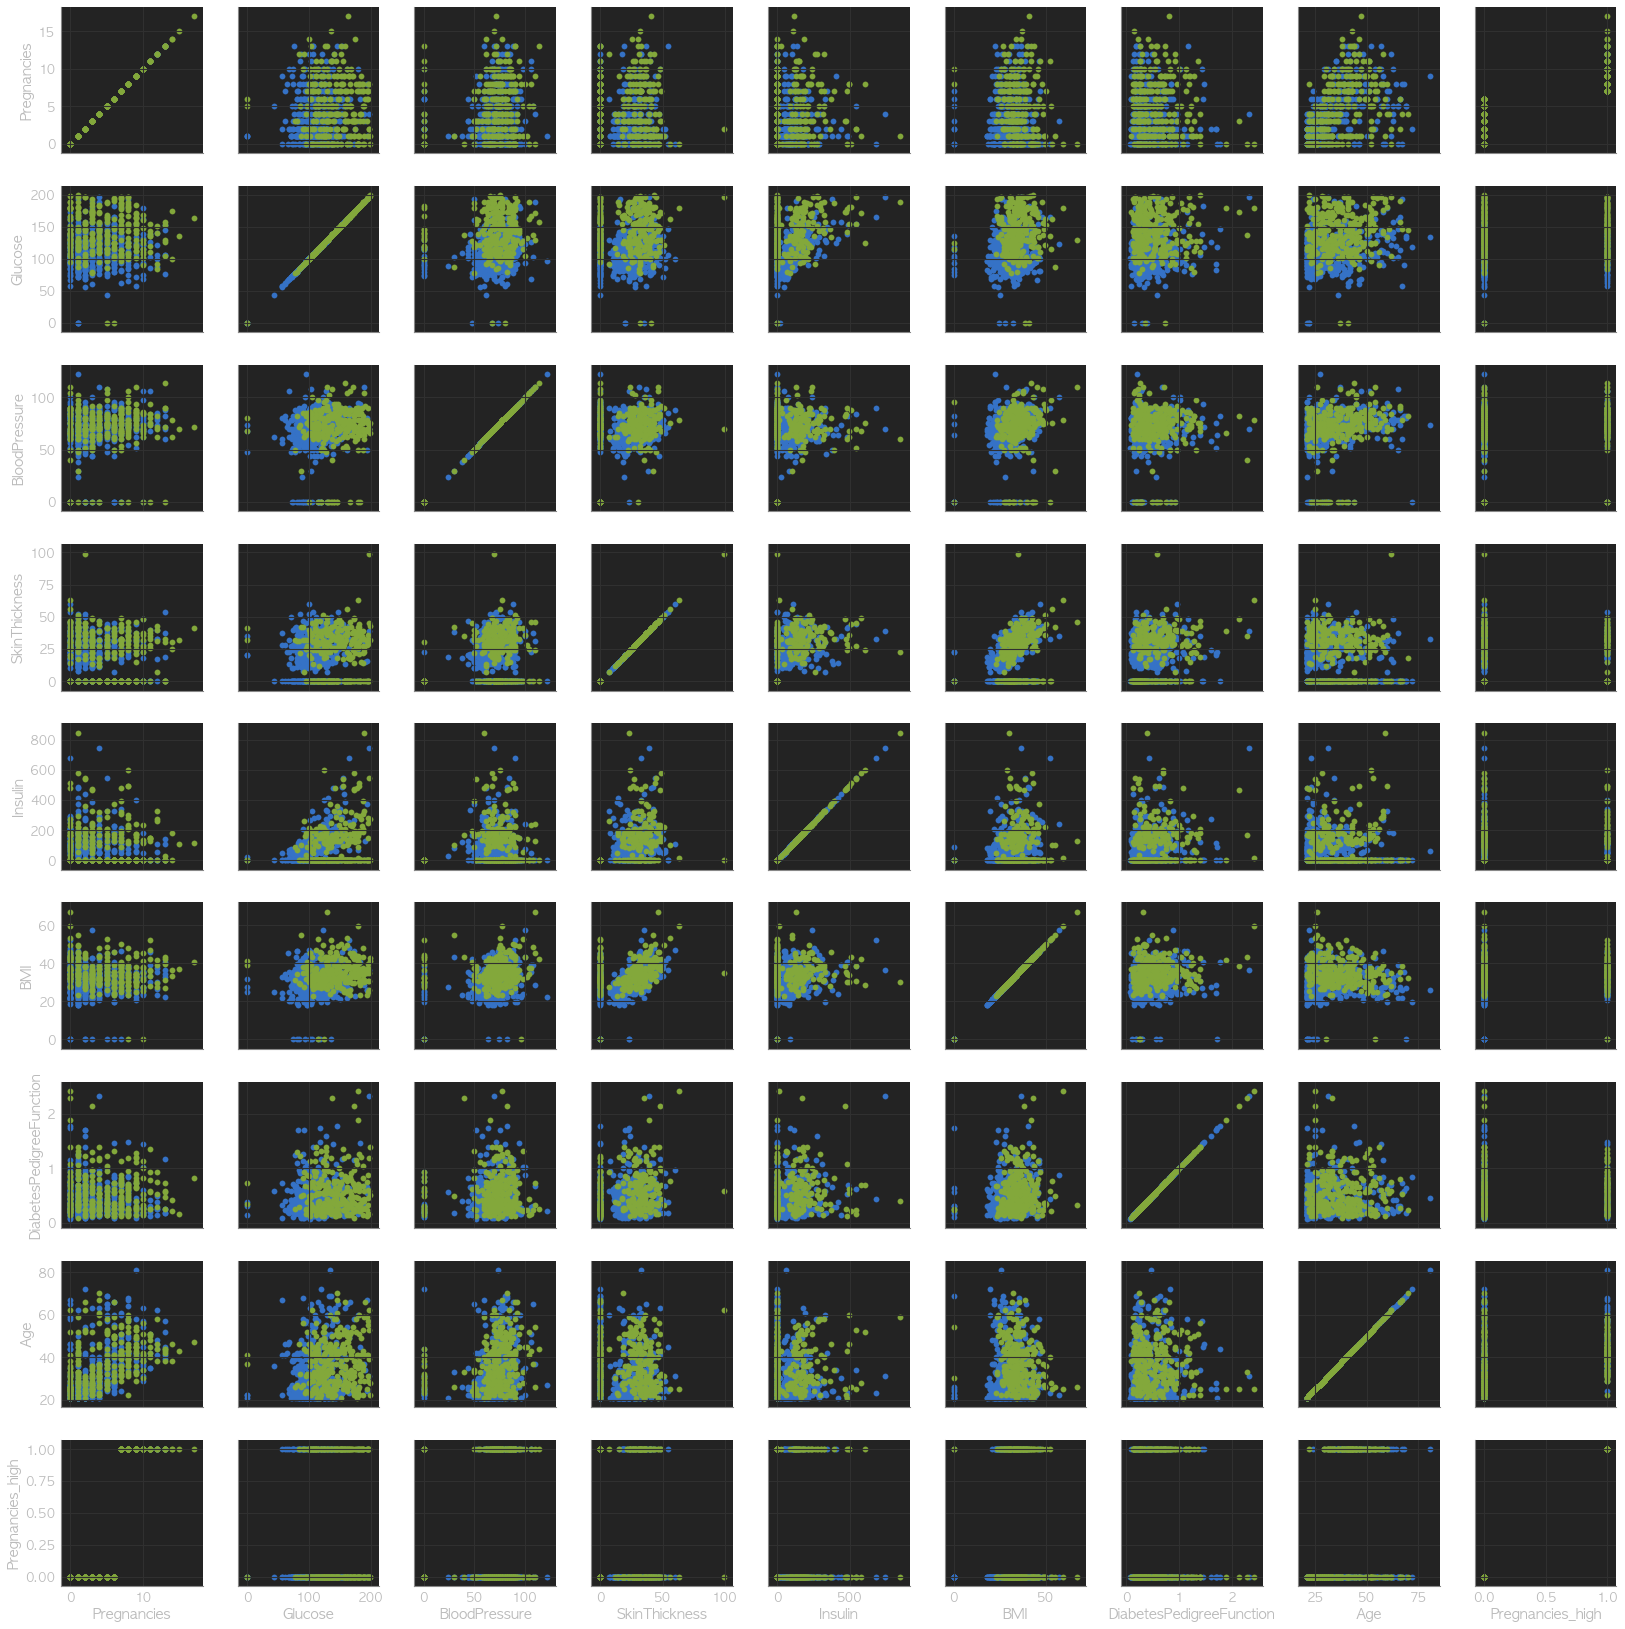

In [56]:
g = sns.PairGrid(diabetes, hue='Outcome')
g.map(plt.scatter)

변수의 흐트러짐을 확인해 볼 수 있다.


## 피처엔지니어링을 위한 상관 계수 분석하기

피처 엔지니어링을 위해 상관 계수를 분석할 수 있다.

- 서버: [상관관계를알기위한수학](https://www.thinkbee.kr/mybook/notebooks/%ED%86%B5%EA%B3%84%ED%99%95%EB%A5%A0/%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84%EB%A5%BC%EC%95%8C%EA%B8%B0%EC%9C%84%ED%95%9C%EC%88%98%ED%95%99.ipynb)


상관 분석은 두 변수 간의 선형적/비선형적 관계를 갖고 있는 지를 분석하는 방법입니다.
수치가 1에 가까우면 강한 양의 상관관계이며 -1에 가까우면 강한 음의 상관관계입니다. 0이면 상관관계가 없습니다.

모든 데이터의 상관관계를 그려보자, 대각선은 자신이므로 1 값이고, 상관계수가 큰 것은 진한 색으로 표시된다.

In [57]:
df_corr = diabetes.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


상관계수를 히트맵으ㅗ 표현

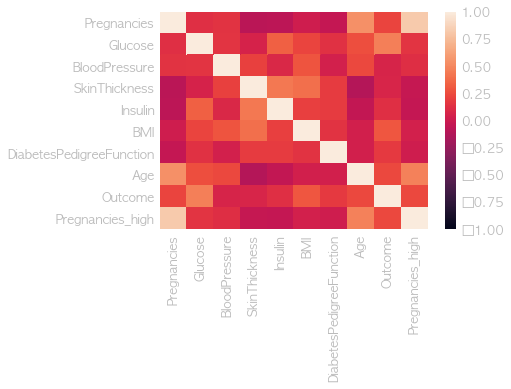

In [58]:
sns.heatmap(df_corr, vmax=1, vmin=-1)

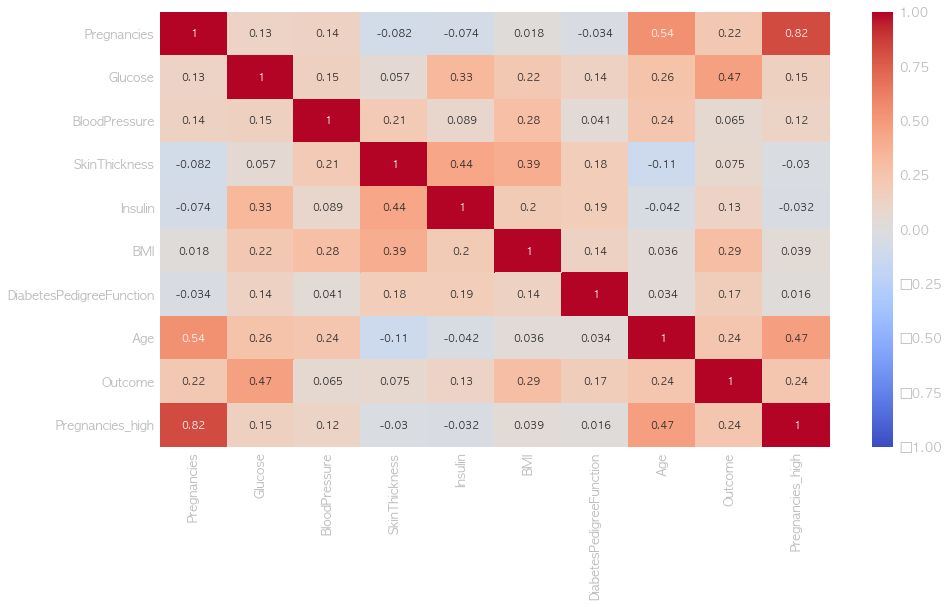

In [59]:
#-1 값이 있으면 컬러맵을 
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm')

디시전트리에서 봤듯이 글루코스가 발병과 상관 계수가 높다.

정답 값인 Outcome 을 제외하고 feature 로 사용할 컬럼에 대해 0을 결측치로 만들고 상관계수를 구한다.

In [60]:
diabetes.iloc[:,:-2].replace(0, np.nan).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32


In [61]:
df_matrix = diabetes.iloc[:,:-2].replace(0, np.nan)
df_matrix['Outcome'] = diabetes['Outcome']
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


결측치로 채워진 피처와 발병값을 가지고 다시 상관계수를 보자,

In [62]:
df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


결측치 처리 전에는 인슐린의 상관계수가 두드러지지 않았지만, 처리한 후 히트맵을 보면 상관계수가 높음을 알 수 있다.

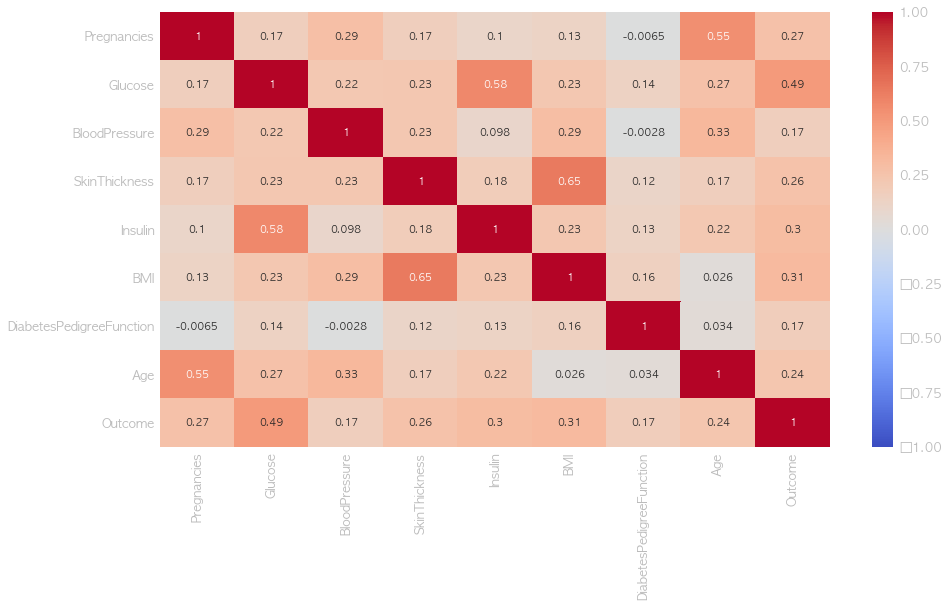

In [63]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm')

Outcome 에 대한 상관계수만 모아서 보면,

In [64]:
df_corr['Outcome']

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

#### 상관계수가 높은 변수끼리 보기

발병율과 상관관계가 큰 인슐린, 글루코스만을 회귀선으로 그려보자,
 - 전처리 전의 데이터는 0 값이 많이 모여 있고
 - 결측치 처리한 데이터 df_matrix 는 상관분포를 잘 표현하고 있다.

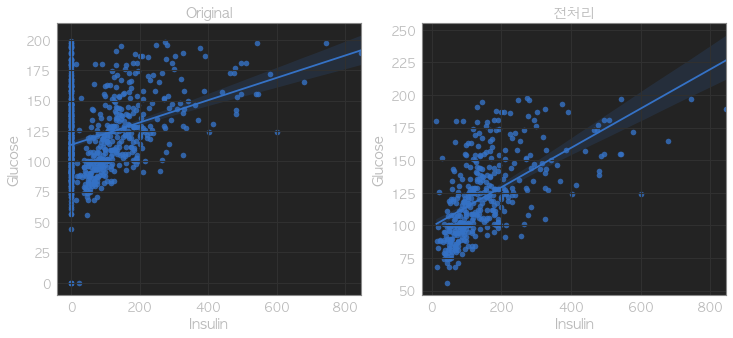

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

axes[0].set_title('Original')
sns.regplot(data=diabetes, x='Insulin', y='Glucose', ax=axes[0]) # 전처리전 데이터
axes[1].set_title('전처리')
sns.regplot(data=df_matrix, x='Insulin', y='Glucose', ax=axes[1])# 전처리한 데이터 (결측치)

인슐린과 글루코스의 상관관계가 높아 보이지만, 우측으로 이상치 데이터도 많이 보인다.

앞서 상관계수에 나이와 임신여부가 높은 상관관계를 보이므로 그래프를 그려보면 위쪽, 오른쪽, 아래쪽에 이상치가 나타난다. 이런 이상치를 쓸지 데이터 처리를 더 할지를 판단해야 한다.

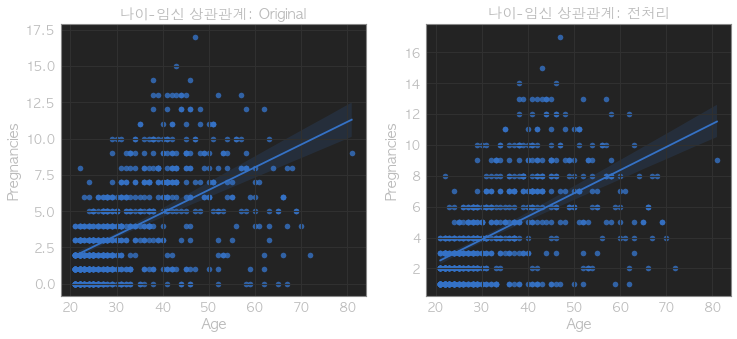

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))


axes[0].set_title('나이-임신 상관관계: Original')
sns.regplot(data=diabetes, x='Age', y='Pregnancies', ax=axes[0]) # 전처리전 데이터
axes[1].set_title('나이-임신 상관관계: 전처리')
sns.regplot(data=df_matrix, x='Age', y='Pregnancies', ax=axes[1])# 전처리한 데이터 (결측치)

나이와 임신여부에 따른 발병률을 다른 색상으로 lmplot 으로 그린다.

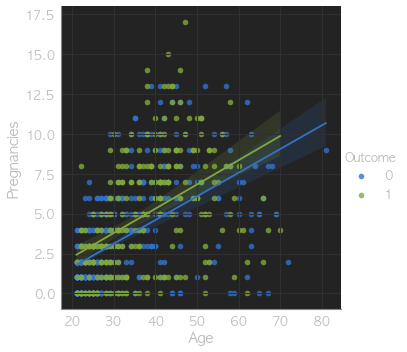

In [74]:
sns.lmplot(data=diabetes, x='Age', y='Pregnancies', hue='Outcome') # 전처리전 데이터

lmplot의 서브플롯은 col, row 값으로 제시할 수 있다. 그래서 Outcome 값에 따라 서브 플롯으로 나누어 볼 수 있다.

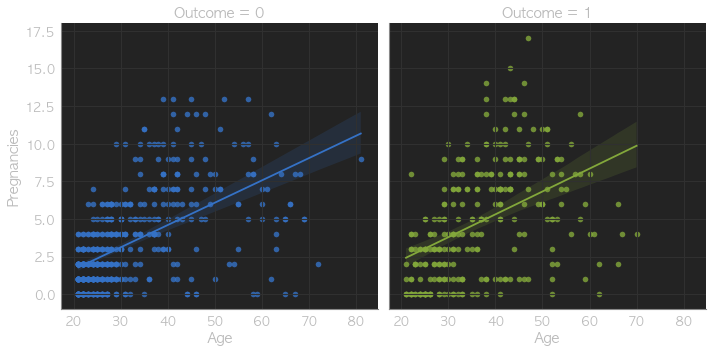

In [75]:
sns.lmplot(data=diabetes, x='Age', y='Pregnancies', hue='Outcome', col='Outcome') # 전처리전 데이터

EDA를 통해서 정답값인 outocme 에 대해서 여러 변수와의 관계를 그려보며 ... 결측치, 이상치 등에 대해서 판단한다.